<a href="https://colab.research.google.com/github/thoik/physics-informed-neural-nets/blob/master/Burgers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch: 1, Loss: 0.499
Epoch: 2, Loss: 0.327
Epoch: 3, Loss: 0.293
Epoch: 4, Loss: 0.317
Epoch: 5, Loss: 0.330
Epoch: 6, Loss: 0.321
Epoch: 7, Loss: 0.302
Epoch: 8, Loss: 0.283
Epoch: 9, Loss: 0.274
Epoch: 10, Loss: 0.274
Epoch: 11, Loss: 0.281
Epoch: 12, Loss: 0.287
Epoch: 13, Loss: 0.289
Epoch: 14, Loss: 0.287
Epoch: 15, Loss: 0.282
Epoch: 16, Loss: 0.277
Epoch: 17, Loss: 0.273
Epoch: 18, Loss: 0.271
Epoch: 19, Loss: 0.271
Epoch: 20, Loss: 0.272
Epoch: 21, Loss: 0.273
Epoch: 22, Loss: 0.274
Epoch: 23, Loss: 0.274
Epoch: 24, Loss: 0.274
Epoch: 25, Loss: 0.273
Epoch: 26, Loss: 0.273
Epoch: 27, Loss: 0.272
Epoch: 28, Loss: 0.272
Epoch: 29, Loss: 0.271
Epoch: 30, Loss: 0.271
Epoch: 31, Loss: 0.271
Epoch: 32, Loss: 0.271
Epoch: 33, Loss: 0.270
Epoch: 34, Loss: 0.270
Epoch: 35, Loss: 0.270
Epoch: 36, Loss: 0.270
Epoch: 37, Loss: 0.270
Epoch: 38, Loss: 0.270
Epoch: 39, Loss: 0.270
Epoch: 40, Loss: 0.270
Epoch: 41, Loss: 0.270
Epoch: 42, Loss: 0.270
Epoch: 43, Loss: 0.270
Epoch: 44, Loss: 0.

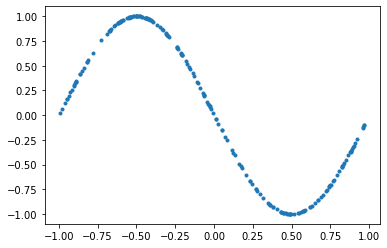

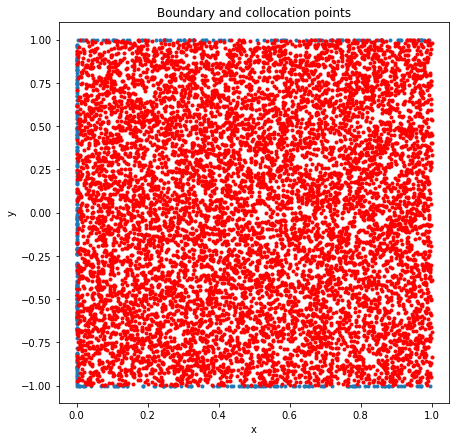

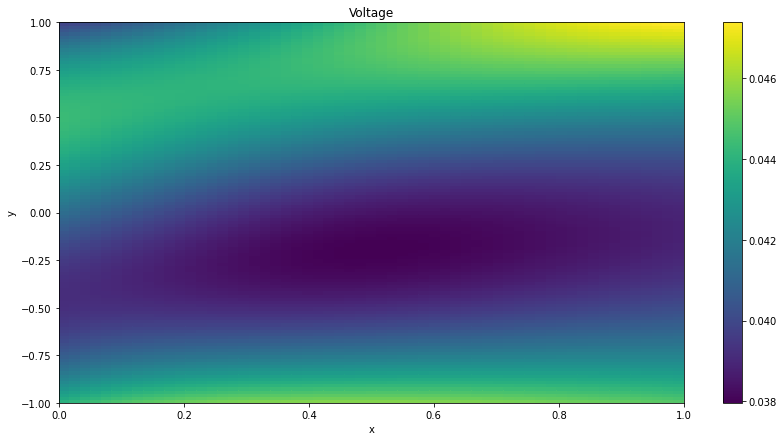

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

frequency=100  #sampling frequency
collocation=50 #number of collocation points
###αδδεδ3
###random sampling from a line
def sample(fro , to, frequency):   #returns frequency number of samples per unit of length
  return np.random.random_sample( (to-fro)*frequency)*(to-fro)+fro

def sample_from_square(limits, sampling_density): 
###limits: tuple that holds the limits of the rectangle i.e. (-1,1,-2,2 ) for a rectangle from x=-1 to x=1 and y=-2 to y=2
###sampling_density: number of points per unit surface

  number_of_points=int((limits[1]-limits[0])*(limits[3]-limits[2])*sampling_density)
  x=np.random.random_sample(number_of_points)*(limits[1]-limits[0])+limits[0]
  y=np.random.random_sample(number_of_points)*(limits[3]-limits[2])+limits[2]
  toRet=np.zeros((number_of_points, 2))
  toRet[:,0]=x
  toRet[:,1]=y  
  return toRet

###obtain data by random sampling

def getData(limits , initial_condition, boundary_conditions, initial_sample_frequency, boundary_sample_frequency):
###limits: tuple that holds the limits of time and position x i.e. (0,1,-1,1) for t from 0 to 1 and x between -1 and 1
###initial_condition: function that returns an 1-D array holding u(0,x) given an 1-D array x 
###boundary_conditions: tuple holding value of u at sides x i.e. (0,0) for boundary conditions u(t,a)=0, u(t,b)=0
###initial_sample_frequency: integer holding number samples of initial condition function per unit length
###boundary_sample_frequency: integer holding number of data points tn representing the boundary conditions u(tn,a)=0, u(tn,b)=0

  """Returns tuple (tx, u)
  tx: numpy array of 2 dimensions.
  i.e. : [ [t1, x1]
          ,[t2, x2] 
          ,........
          ,[tn, xn] ]

  u: numpy array of one dimension holding the value of u at coordinates t, x."""

  points=np.zeros((0,2))
  t1=sample(limits[0], limits[1], boundary_sampling_frequency)
  t2=sample(limits[0], limits[1], boundary_sampling_frequency)
  x1=sample(limits[2], limits[3], initial_sample_frequency)
  side1=np.zeros((len(t1), 2))
  side2=np.zeros((len(t2), 2))
  side3=np.zeros((len(x1), 2))

  side1[:,0]=t1
  side1[:,1]=limits[2]
  side2[:,0]=t2
  side2[:,1]=limits[3]
  side3[:,0]=limits[0]
  side3[:,1]=x1


  points=np.append(points, side1, 0)
  points=np.append(points, side2, 0)
  points=np.append(points, side3, 0)

  u=np.zeros((0))
  u1=np.ones(len(t1))*boundary_conditions[0]
  u2=np.ones(len(t2))*boundary_conditions[1]
  u3=initial_condition(x1)

  u=np.append(u, u1, 0)
  u=np.append(u, u2, 0)
  u=np.append(u, u3, 0)
  plt.plot(x1, u3,".")


  return points, u

###obtain data and coordinates of collocation points
def initial_condition(x):
  return -np.sin(x*np.pi)

limits=(0,1,-1,1)
boundary_conditions=(0.,0.)
initial_sample_frequency=100
boundary_sampling_frequency=100
collocation_density=5000

data=getData(limits, initial_condition, boundary_conditions, initial_sample_frequency, boundary_sampling_frequency)
x_coll=sample_from_square(limits, collocation_density)
x_train=data[0]
y_train=data[1]

###Visualizing Boundary and collocation points
plt.figure(figsize=[7,7])
plt.plot(x_train[:,0],x_train[:,1],".")
plt.plot(x_coll[:,0],x_coll[:,1],"r.")
plt.title("Boundary and collocation points")
plt.xlabel("x")
plt.ylabel("y")

#create the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation="tanh",input_shape=(2,)))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="tanh"))


#choose optimizer
optimizer = tf.keras.optimizers.Adam()


#physics informed part
def u(x):
  return model(x)

def f(x):
  with tf.GradientTape() as t0:
    t0.watch(x)
    with tf.GradientTape() as t:
      t.watch(x)
      u1=u(x)
    uprime=t.gradient(u1, x)
  usec=t0.gradient(uprime, x)
  u_t=uprime[:,0]
  u_x=uprime[:,1]
  u_tt=usec[:,0]
  u_xx=usec[:,1]
  return u_t + u1*u_x - (0.01/np.pi)*u_xx


#train the model 
# For each one of the iterations.
epochs=200

for epoch in range(epochs): 
    xc=tf.constant(x_coll, tf.float32)
    with tf.GradientTape() as tape :
        y_predicted=model(data[0])
        loss = tf.math.reduce_mean(tf.math.square(f(xc))) + tf.math.reduce_mean(tf.math.square(y_train-y_predicted)) ###loss function is MSE_u+MSE_f as shown in the paper
    #
    if (epoch+1)%1==0:
      print("\nEpoch: {}, Loss: {:.3f}".format(epoch+1, loss.numpy()), end = "")
    #
    grads = tape.gradient(loss, model.trainable_variables) # Calculate the derivatives.
    optimizer.apply_gradients(zip(grads, model.trainable_variables)) # Back propagations.

model.save("Burgers2000tanh.h5")


x=np.linspace(limits[0], limits[1], 60)
y=np.linspace(limits[2], limits[3], 120)
U=np.zeros((len(x),len(y)))
for i in range(len(x)):
  for j in range(len(y)):
    U[i,j]= model.predict([[x[i],y[j]]])
X,Y=np.meshgrid(x,y,indexing="ij")
plt.figure(figsize=[14,7])
plt.pcolormesh(X,Y, U,cmap="viridis")
plt.title("Voltage")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()
